In [7]:
import pandas as pd
import joblib

# Load data
preprocessed_df = pd.read_csv("processed_data/preprocessed_dataset.csv")
label_encoders = joblib.load("processed_data/label_encoders.sav")

# Đếm số lượng mẫu theo từng năm
year_counts = preprocessed_df['year'].value_counts().sort_index()
year_counts


year
1983       1
1994       3
1995       2
1996       3
1997      11
1998      13
1999      19
2000      27
2001      15
2002      42
2003      67
2004      98
2005     155
2006     206
2007     306
2008     412
2009     486
2010     805
2011    1223
2012    1428
2013    1541
2014    1611
2015    1713
2016    1774
2017    1807
2018    1290
2019     789
2020     100
Name: count, dtype: int64

In [ ]:
import pandas as pd
import os

# Đọc dữ liệu
preprocessed_df = pd.read_csv("processed_data/preprocessed_dataset.csv")

# Tạo thư mục output nếu chưa có
output_dir = "processed_data/by_year_v2"
os.makedirs(output_dir, exist_ok=True)

# Lưu từng năm thành file riêng
for year in preprocessed_df['year'].unique():
    if year < 2012:
        continue
    df_year = preprocessed_df[preprocessed_df['year'] == year]
    df_year.to_csv(f"{output_dir}/{year}.csv", index=False)

# Gộp các năm nhỏ hơn 2012 vào file nhỏ hơn
smaller_years_df = preprocessed_df[preprocessed_df['year'] < 2012]
smaller_years_df.to_csv(f"{output_dir}/smaller_years.csv", index=False)


MSE: 32.2518, RMSE: 5.6791, MAE: 2.7000
MSE:  32.252
RMSE: 5.679
MAE:  2.700


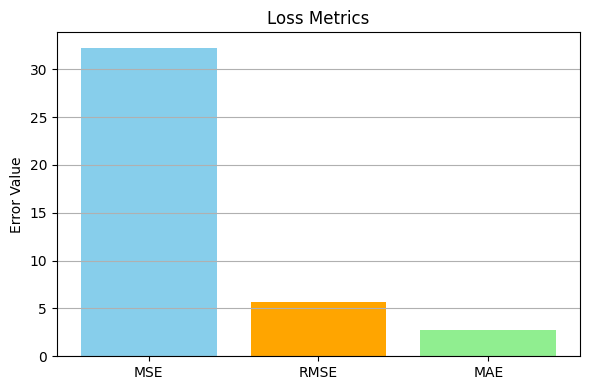

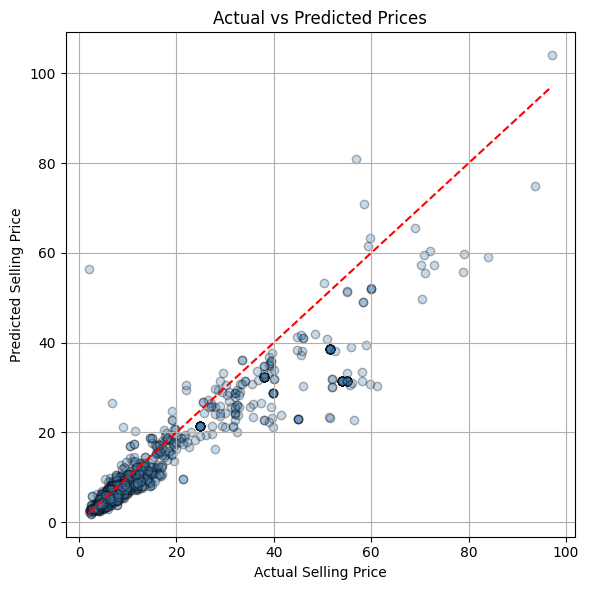

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("processed_data/preprocessed_dataset.csv")

# Tạo tập train và test
train_df = df[df['year'].isin([2015, 2016, 2017])]
test_df = df[df['year'].isin([2018, 2019, 2020])]

# Đặc trưng và nhãn
features = ['km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
target = 'selling_price'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Huấn luyện mô hình
model = RandomForestRegressor(n_estimators=100,)
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")


# Metrics

print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")

# Plot loss metrics
plt.figure(figsize=(6, 4))
loss_names = ['MSE', 'RMSE', 'MAE']
loss_values = [mse, rmse, mae]
plt.bar(loss_names, loss_values, color=['skyblue', 'orange', 'lightgreen'])
plt.title('Loss Metrics')
plt.ylabel('Error Value')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='steelblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
MSE:  31.926
RMSE: 5.650
MAE:  2.657


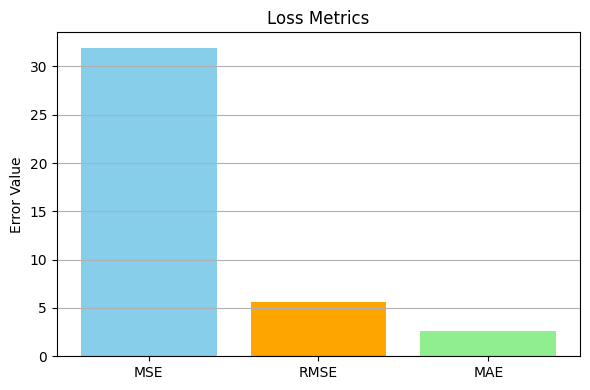

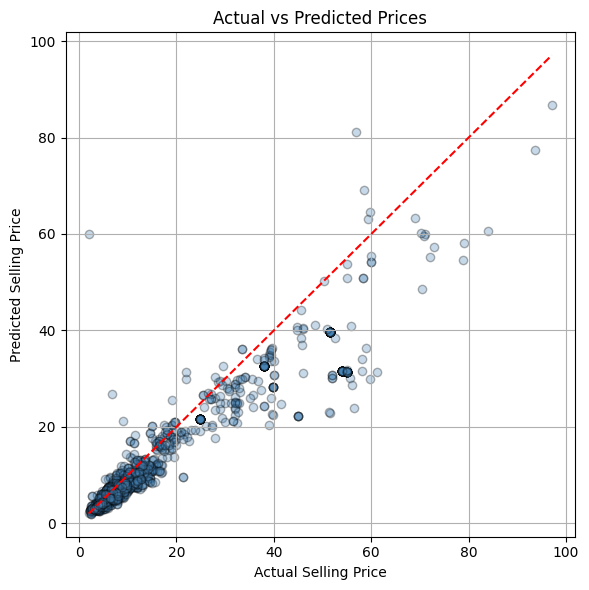

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv("processed_data/preprocessed_dataset.csv")

# Tạo tập train và test
train_df = df[df['year'].isin([2015, 2016, 2017])]
test_df = df[df['year'].isin([2018, 2019, 2020])]

# Đặc trưng và nhãn
features = ['km_driven', 'fuel', 'transmission', 'owner',
            'mileage', 'engine', 'max_power', 'seats']
target = 'selling_price'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Mô hình tốt nhất
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Dự đoán và đánh giá
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")

# Biểu đồ loss
plt.figure(figsize=(6, 4))
loss_names = ['MSE', 'RMSE', 'MAE']
loss_values = [mse, rmse, mae]
plt.bar(loss_names, loss_values, color=['skyblue', 'orange', 'lightgreen'])
plt.title('Loss Metrics')
plt.ylabel('Error Value')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='steelblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.tight_layout()
plt.show()
